In [1]:
import numpy as np
import pandas as pd
import scipy
from datetime import datetime
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline

## Civilian Unemployment Rate

The unemployment rate represents the number of unemployed as a percentage from the labor force. The data represents workers over the age of 16 living in one of the fifty states in the US. The information comes from the 'Current Population Survey (Household Survey)'.

In [2]:
unrate = pd.read_csv('UNRATE.csv')

In [3]:
unrate.head()

,DATE,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [4]:
unrate['rate']=pd.to_numeric(unrate.UNRATE, errors='coerce')

unrate.dropna(inplace=True)

In [5]:
unrate.head()

,DATE,UNRATE,rate
0,1948-01-01,3.4,3.4
1,1948-02-01,3.8,3.8
2,1948-03-01,4.0,4.0
3,1948-04-01,3.9,3.9
4,1948-05-01,3.5,3.5


### 1. Plot Time Series

It seems that there are seasonal trends where the unemployment rates are really high, then decrease and the rates get higher again. I will use differencing to make the data stationary.

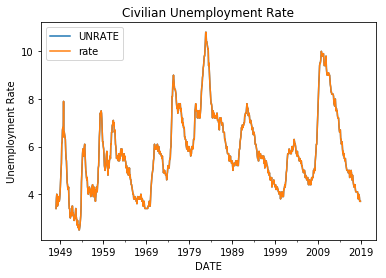

In [6]:
unrate.index = pd.to_datetime(unrate.DATE)
unrate.plot()
plt.title('Civilian Unemployment Rate')
plt.ylabel('Unemployment Rate')
plt.show()

### 2. Use differencing to make data set stationary.

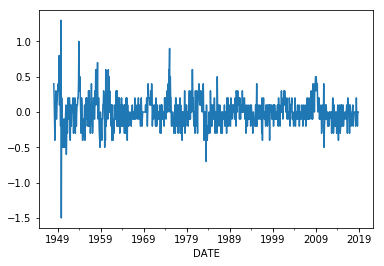

In [7]:
unrate['diff1'] = unrate.rate - unrate.rate.shift()
unrate.diff1.plot()
plt.show()

### 3. Generate and interpret an autocorrelation function (PACF)

Using PCAF, it seems that there are stong correlation values at lag values 1 through 6. I will use these values when creating the ARIMA models.

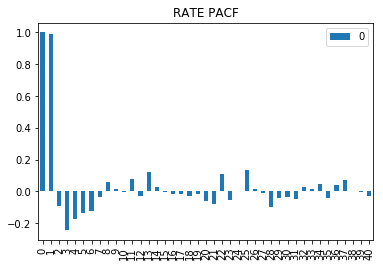

In [8]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(unrate.rate))
x_acf.plot(kind='bar')
plt.title("RATE PACF")
plt.show()

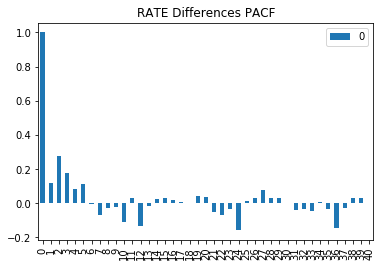

In [9]:
from statsmodels.tsa.stattools import pacf
x_acf = pd.DataFrame(pacf(unrate.diff1[1:]))
x_acf.plot(kind='bar')
plt.title("RATE Differences PACF")
plt.show()

### 5. Generate 5 ARIMA specifications

I will use 5 ARIMA models with the following (p,d,q) values:
(0,1,0), (1,1,0), (2,1,0), (3,1,0), (4,1,0), and (2,1,2)

For each model, I will print the results summary, plot the residuals with a scatter plot and histogram to check for normalness.



In [10]:
#(0,1,0)
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(unrate.rate, order=(0,1,0))
model_fit = model1.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-t

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  850
Model:                 ARIMA(0, 1, 0)   Log Likelihood                 125.644
Method:                           css   S.D. of innovations              0.209
Date:                Sun, 23 Dec 2018   AIC                           -247.289
Time:                        11:10:29   BIC                           -237.798
Sample:                    02-01-1948   HQIC                          -243.653
                         - 11-01-2018                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.007      0.049      0.961      -0.014       0.014
Residuals Description
count    8.500000e+02
mean     2.995506e-09
std      2.088442e-01
min     -1.500353e+00
25%     -1.003529e-01

In [11]:
(1,1,0)
from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(unrate.rate, order=(1,1,0))
model_fit = model1.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-t

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  850
Model:                 ARIMA(1, 1, 0)   Log Likelihood                 131.903
Method:                       css-mle   S.D. of innovations              0.207
Date:                Sun, 23 Dec 2018   AIC                           -257.806
Time:                        11:10:29   BIC                           -243.570
Sample:                    02-01-1948   HQIC                          -252.353
                         - 11-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0004      0.008      0.052      0.959      -0.015       0.016
ar.L1.D.rate     0.1211      0.034      3.551      0.000       0.054       0.188
                                    Roots   

Text(0.5,1,'Histogram of Residuals')

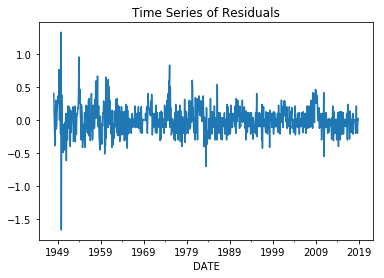

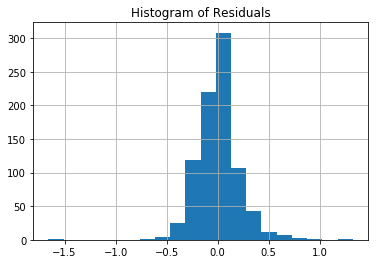

In [12]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

In [13]:
#(2,1,0)
from statsmodels.tsa.arima_model import ARIMA
model2 = ARIMA(unrate.rate, order=(2,1,0))
model_fit = model2.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-t

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  850
Model:                 ARIMA(2, 1, 0)   Log Likelihood                 164.889
Method:                       css-mle   S.D. of innovations              0.199
Date:                Sun, 23 Dec 2018   AIC                           -321.779
Time:                        11:10:30   BIC                           -302.798
Sample:                    02-01-1948   HQIC                          -314.508
                         - 11-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0007      0.011      0.067      0.946      -0.020       0.022
ar.L1.D.rate     0.0885      0.033      2.679      0.008       0.024       0.153
ar.L2.D.rate     0.2736      0.033      8.28

Text(0.5,1,'Histogram of Residuals')

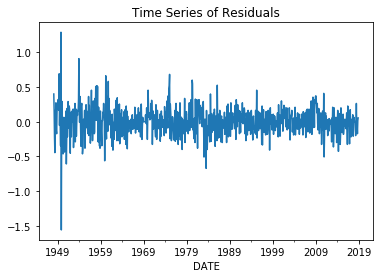

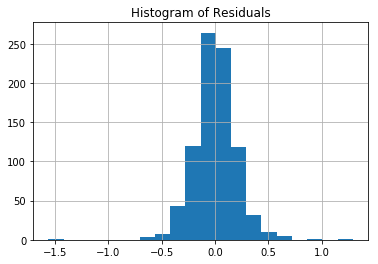

In [14]:
residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-t

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  850
Model:                 ARIMA(3, 1, 0)   Log Likelihood                 177.984
Method:                       css-mle   S.D. of innovations              0.196
Date:                Sun, 23 Dec 2018   AIC                           -345.968
Time:                        11:10:31   BIC                           -322.242
Sample:                    02-01-1948   HQIC                          -336.880
                         - 11-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0008      0.013      0.067      0.947      -0.024       0.026
ar.L1.D.rate     0.0403      0.034      1.192      0.234      -0.026       0.107
ar.L2.D.rate     0.2584      0.033      7.91

Text(0.5,1,'Histogram of Residuals')

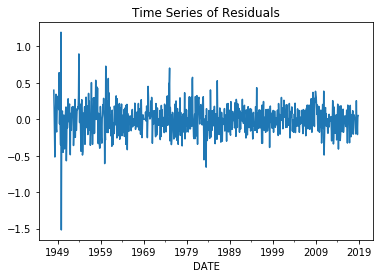

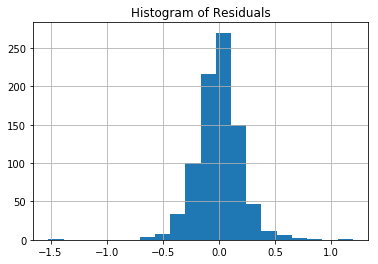

In [15]:
#(3,1,0)
from statsmodels.tsa.arima_model import ARIMA
model3 = ARIMA(unrate.rate, order=(3,1,0))
model_fit = model3.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1341: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  out_full[ind] += zi
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\scipy\signal\signaltools.py:1344: FutureWarning: Using a non-t

                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  850
Model:                 ARIMA(4, 1, 0)   Log Likelihood                 180.977
Method:                       css-mle   S.D. of innovations              0.196
Date:                Sun, 23 Dec 2018   AIC                           -349.954
Time:                        11:10:33   BIC                           -321.482
Sample:                    02-01-1948   HQIC                          -339.048
                         - 11-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0008      0.014      0.059      0.953      -0.026       0.028
ar.L1.D.rate     0.0251      0.034      0.732      0.464      -0.042       0.092
ar.L2.D.rate     0.2363      0.034      6.99

Text(0.5,1,'Histogram of Residuals')

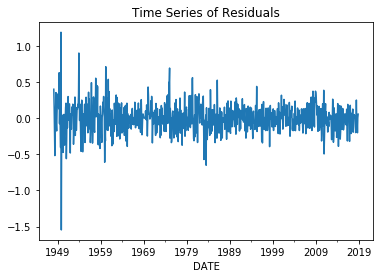

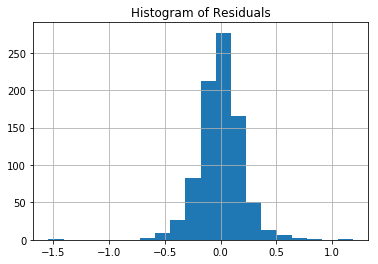

In [16]:
#(4,1,0)
from statsmodels.tsa.arima_model import ARIMA
model4 = ARIMA(unrate.rate, order=(4,1,0))
model_fit = model4.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)
c:\users\edgor\appdata\local\programs\python\python37-32\lib\site-packages\statsmodels\tsa\base\tsa_model.py:171: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  % freq, ValueWarning)


                             ARIMA Model Results                              
Dep. Variable:                 D.rate   No. Observations:                  850
Model:                 ARIMA(2, 1, 2)   Log Likelihood                 189.780
Method:                       css-mle   S.D. of innovations              0.193
Date:                Sun, 23 Dec 2018   AIC                           -367.560
Time:                        11:10:35   BIC                           -339.089
Sample:                    02-01-1948   HQIC                          -356.654
                         - 11-01-2018                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0010      0.012      0.083      0.934      -0.022       0.024
ar.L1.D.rate     1.6543      0.040     41.508      0.000       1.576       1.732
ar.L2.D.rate    -0.7775      0.045    -17.45

Text(0.5,1,'Histogram of Residuals')

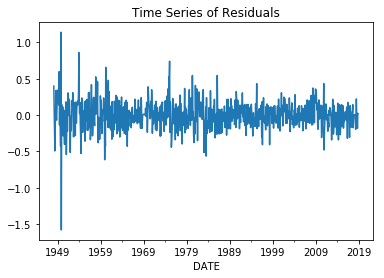

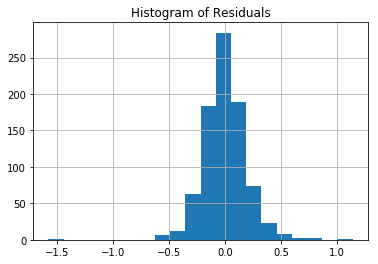

In [17]:
#(2,1,2)
from statsmodels.tsa.arima_model import ARIMA
model5 = ARIMA(unrate.rate, order=(2,1,2))
model_fit = model5.fit()
print(model_fit.summary())
print('Residuals Description')
print(model_fit.resid.describe())

residuals = pd.DataFrame(model_fit.resid)

residuals.plot(legend=False)
plt.title('Time Series of Residuals')

residuals.hist(bins=20)
plt.title('Histogram of Residuals')

### 6. Choose one specification and make the case for that as a logical model for your dataset.

Now I will choose the best ARIMA model based on AIC value. The models with the lowest AIC values where (3,1,0), (4,1,0), and (2,1,2). Their AIC values were pretty close but I will check the loss to calculute the probability that the model minimizes loss of information.

In [20]:
AIC310 = -345.968
AIC410 = -349.954
AIC212 = -367.56

loss_310 = np.exp((AIC212 - AIC310) / 2)
loss_410 = np.exp((AIC212 - AIC410) / 2)

print(loss_310)
print(loss_410)

2.0481264838656545e-05
0.00015028155349123808


From the results above, it seems that ARIMA(4,1,0) is the best model.  We get a probability of 0.000150 that we lost less information in this model, which is higher that the probability of the ARIMA(3,1,0) model.